In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

In [2]:
import sys
sys.path.append('/Users/angel/Projects/PyPharmer_devel/PyPharmer/V_05/Code/')
import matplotlib as mt
from matplotlib import pylab
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import itertools as it
import networkx as nx
import numpy as np
import simplejson as json
import os 
from pprint import pprint


In [3]:
import descriptors_extractor as phr

In [4]:
zinc_file='../Benchmarks/Server_Files/ZINCpharmer.json'
pharmit_file='../Benchmarks/Server_Files/pharmit.json'
pharmer_file='../Benchmarks/Server_Files/gold_soln_l2199_3D_H_Ch_m1_4.json'
benchmark='../benchmarks/BCR-ABL_Tyrosin_Kinase_Inhibitors/1iep_A_STI.json'

In [5]:
bench=phr.Descriptors (input_file=benchmark,select='enabled')

In [6]:
bench.points

array([['Aromatic', 11.971, 60.92, 12.054, 1.1, 0, 0, 0],
       ['HydrogenDonor', 14.852, 55.627, 12.128, 0.5, 0, 0, 0],
       ['HydrogenDonor', 16.6, 51.81, 14.798, 0.5, 0, 0, 0],
       ['HydrogenAcceptor', 10.961, 60.425, 11.216, 0.5, 0, 0, 0],
       ['HydrogenAcceptor', 14.789, 52.612, 15.983, 0.5, 0, 0, 0],
       ['Hydrophobic', 11.971, 60.92, 12.054, 1, 0, 0, 0],
       ['Hydrophobic', 16.806, 53.618, 12.545, 1, 0, 0, 0],
       ['Hydrophobic', 17.148, 55.406, 10.154, 1, 0, 0, 0]], dtype=object)

In [7]:
G= nx.Graph (pharmacophore='descriptors')
for i in bench.points:
    m=[l for l in i]
    m=tuple(m)
    G.add_node (node_for_adding=m[1:], name=m[0])
    result=list(it.combinations(G.nodes,2))
    for j in list(result):
        G.add_edge (j[0],j[1])

<IPython.core.display.Javascript object>


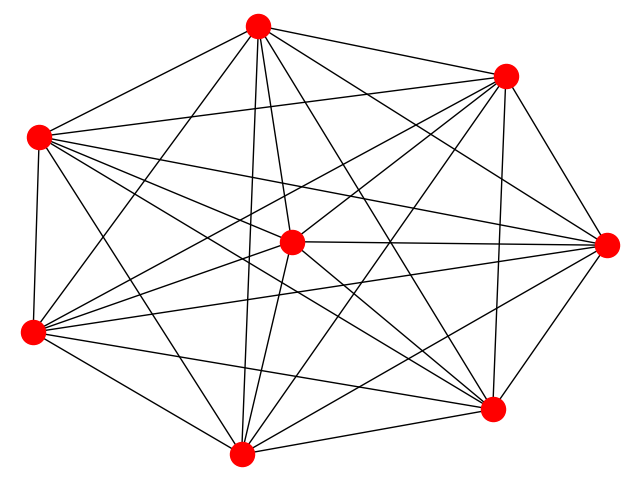

In [9]:
nx.draw (G)

In [10]:
G.nodes

NodeView(((11.971, 60.92, 12.054, 1.1, 0, 0, 0), (14.852, 55.627, 12.128, 0.5, 0, 0, 0), (16.6, 51.81, 14.798, 0.5, 0, 0, 0), (10.961, 60.425, 11.216, 0.5, 0, 0, 0), (14.789, 52.612, 15.983, 0.5, 0, 0, 0), (11.971, 60.92, 12.054, 1, 0, 0, 0), (16.806, 53.618, 12.545, 1, 0, 0, 0), (17.148, 55.406, 10.154, 1, 0, 0, 0)))

opening multiple files form benchmark folder to analyze clique clustering

In [11]:
BCR_ABL_path= '../benchmarks/BCR-ABL_Tyrosin_Kinase_Inhibitors/'
ligands = []
for filename in os.listdir(BCR_ABL_path):
    if '.json' in filename:
        ligands.append(BCR_ABL_path+filename)
pprint (ligands)

['../benchmarks/BCR-ABL_Tyrosin_Kinase_Inhibitors/1opj_A_STI.json',
 '../benchmarks/BCR-ABL_Tyrosin_Kinase_Inhibitors/1iep_B_STI.json',
 '../benchmarks/BCR-ABL_Tyrosin_Kinase_Inhibitors/1fpu_B_PRC.json',
 '../benchmarks/BCR-ABL_Tyrosin_Kinase_Inhibitors/1opj_B_STI.json',
 '../benchmarks/BCR-ABL_Tyrosin_Kinase_Inhibitors/1iep_A_STI.json',
 '../benchmarks/BCR-ABL_Tyrosin_Kinase_Inhibitors/1fpu_A_PRC.json']


In [12]:
for file in ligands:
    data=phr.Descriptors (input_file=file,select='enabled')
    G= nx.Graph (pharmacophore='descriptors')
    for i in data.points:
        m=[l for l in i]
        m=tuple(m)
        G.add_node (node_for_adding=m[1:], name=m[0])
        result=list(it.combinations(G.nodes,2))
        for j in list(result):
            G.add_edge (j[0],j[1])

<IPython.core.display.Javascript object>


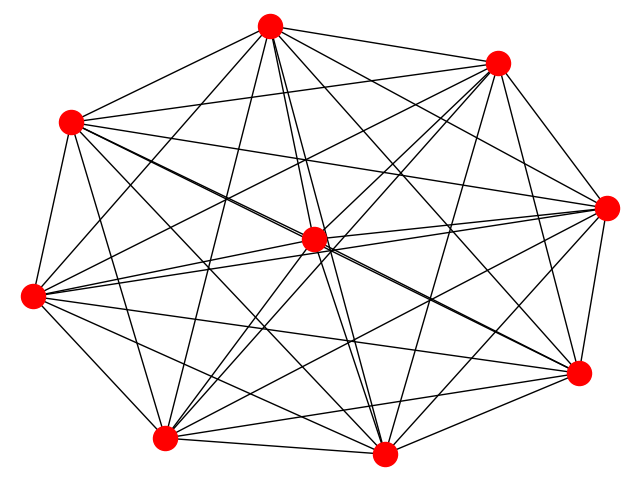

In [13]:
nx.draw (G)

In [14]:
data.points

array([['Aromatic', 11.636, 60.16, 12.085, 1.1, 0, 0, 0],
       ['HydrogenDonor', 14.657, 55.013, 12.152, 0.5, 0, 0, 0],
       ['HydrogenDonor', 16.661, 51.228, 14.538, 0.5, 0, 0, 0],
       ['HydrogenAcceptor', 10.615, 59.639, 11.334, 0.5, 0, 0, 0],
       ['HydrogenAcceptor', 14.823, 51.786, 15.735, 0.5, 0, 0, 0],
       ['Hydrophobic', 11.636, 60.16, 12.085, 1, 0, 0, 0],
       ['Hydrophobic', 16.702, 53.106, 12.417, 1, 0, 0, 0],
       ['Hydrophobic', 16.107, 48.795, 17.282, 1, 0, 0, 0],
       ['Hydrophobic', 16.912, 54.912, 10.105, 1, 0, 0, 0]], dtype=object)